In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Loading data into DataFrame...
Total rows in dataset: 40315

Columns statistics (excluding original keys):
CashAndCashEquivalentsAtCarryingValue: nulls = 3890, percentage_nulls = 9.65%, mean = 731594210.76, median = 121074000.00, std = 5469744312.61
IncomeTaxExpenseBenefit: nulls = 5365, percentage_nulls = 13.31%, mean = 130269108.57, median = 14672000.00, std = 901179477.11
StockholdersEquity: nulls = 6203, percentage_nulls = 15.39%, mean = 3044358844.11, median = 626046000.00, std = 12576835732.67
Assets: nulls = 6329, percentage_nulls = 15.70%, mean = 16459595757.65, median = 2221564000.00, std = 109068798978.47
LiabilitiesAndStockholdersEquity: nulls = 6572, percentage_nulls = 16.30%, mean = 16508336380.06, median = 2221628000.00, std = 109448893170.73
EntityPublicFloat: nulls = 6721, percentage_nulls = 16.67%, mean = 98013650516377.09, median = 1301570371.00, std = 9467241209411998.00
NetIncomeLoss: nulls = 6898, percentage_nulls = 17.11%, mean = 367845101.34, median = 48135000.00

C:\Users\Angelo\AppData\Local\Temp\ipykernel_22980\1287994666.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=columns_to_plot_df, x='percentage_nulls', y='column', palette='viridis')


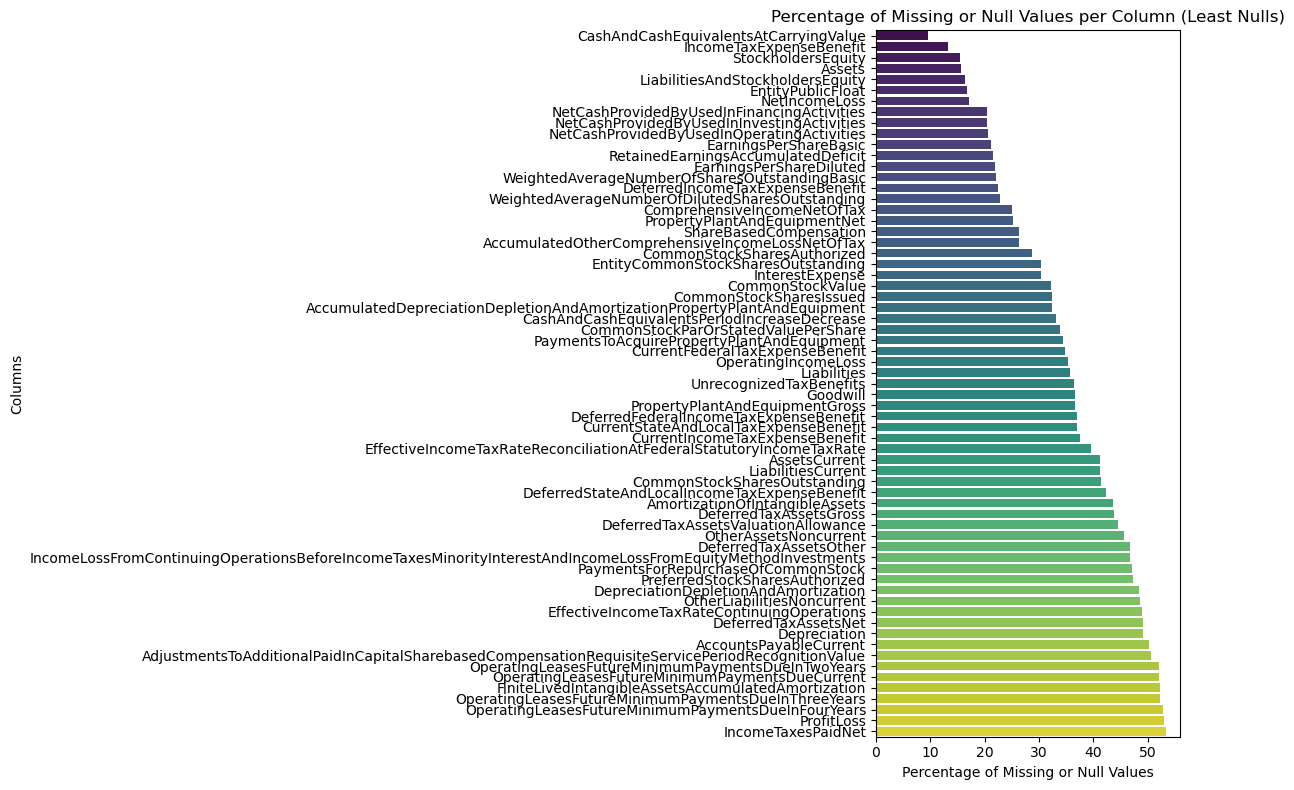

In [16]:

filename = './outputs/ecl_filtered.json'

print("Loading data into DataFrame...")

# Load the entire dataset
df = pd.read_json(filename, lines=True)

print(f"Total rows in dataset: {len(df)}")

# List of original columns to exclude from analysis
original_keys = [
    'bankruptcy_date_1', 'label', 'bankruptcy_date_2', 'filing_date', 'datadate',
    'bankruptcy_date_3', 'opinion_text', 'item_7', 'bankruptcy_prediction_split',
    'cik', 'company', 'period_of_report', 'cik_year', 'qualified', 'gc_list',
    'can_label', 'filename', 'gvkey'
]

# Get the list of columns to analyze (excluding original_keys)
columns_to_analyze = [col for col in df.columns if col not in original_keys]

# Initialize a list to hold the statistics
columns_stats = []

# print(df.head(10))
# print(df["CashAndCashEquivalentsAtCarryingValue"].head(10))

for col in columns_to_analyze:
    null_count = df[col].isnull().sum()
    total_count = len(df)
    percentage_nulls = (null_count / total_count) * 100
    
    # Initialize mean, median, std to None
    mean_value = None
    median_value = None
    std_value = None
    
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df[col]):
        # Compute statistics on non-null values
        mean_value = df[col].mean()
        median_value = df[col].median()
        std_value = df[col].std()
    
    columns_stats.append({
        'column': col,
        'null_count': null_count,
        'percentage_nulls': percentage_nulls,
        'mean': mean_value,
        'median': median_value,
        'std': std_value
    })

# Convert to DataFrame
columns_stats_df = pd.DataFrame(columns_stats)

# Sort by percentage_nulls in ascending order (least nulls first)
columns_stats_df = columns_stats_df.sort_values(by='percentage_nulls')

print("\nColumns statistics (excluding original keys):")
for idx, row in columns_stats_df.iterrows():
    print(f"{row['column']}: nulls = {row['null_count']}, percentage_nulls = {row['percentage_nulls']:.2f}%, mean = {row['mean']:.2f}, median = {row['median']:.2f}, std = {row['std']:.2f}")

# Plotting the distribution of null percentages for columns with the least nulls
# Optionally limit the number of columns plotted
max_columns_to_plot = 65  # Adjust as needed
columns_to_plot_df = columns_stats_df.head(max_columns_to_plot)

plt.figure(figsize=(12, 8))
sns.barplot(data=columns_to_plot_df, x='percentage_nulls', y='column', palette='viridis')
plt.title('Percentage of Missing or Null Values per Column (Least Nulls)')
plt.xlabel('Percentage of Missing or Null Values')
plt.ylabel('Columns')
plt.tight_layout()
plt.show()

In [17]:
# Testing dense submatrix
# Set a threshold for maximum acceptable percentage of nulls
max_null_percentage = 20

# Filter columns that meet the threshold
dense_columns = columns_stats_df[columns_stats_df['percentage_nulls'] <= max_null_percentage]['column'].tolist()

# Create a submatrix with these columns
dense_submatrix = df[dense_columns]

# drop rows with any remaining nulls in these columns
dense_submatrix = dense_submatrix.dropna(subset=dense_columns)

print(f"\nDense submatrix shape: {dense_submatrix.shape}")
dense_submatrix.head(20)


Dense submatrix shape: (26028, 7)


,CashAndCashEquivalentsAtCarryingValue,IncomeTaxExpenseBenefit,StockholdersEquity,Assets,LiabilitiesAndStockholdersEquity,EntityPublicFloat,NetIncomeLoss
2,7.937000e+07,22190000.0,7.469060e+08,1.500181e+09,1.500181e+09,9.345680e+08,4.462800e+07
3,5.743300e+07,35364000.0,8.358450e+08,1.703727e+09,1.703727e+09,9.345680e+08,6.982600e+07
4,6.772000e+07,25480000.0,8.646000e+08,2.195653e+09,2.195653e+09,6.995378e+08,6.772300e+07
5,7.530000e+07,26700000.0,9.186000e+08,2.136900e+09,2.136900e+09,5.780988e+08,5.500000e+07
6,8.920000e+07,32100000.0,9.995000e+08,2.199500e+09,2.199500e+09,9.620000e+08,7.290000e+07
7,5.470000e+07,-28500000.0,8.451000e+08,1.515000e+09,1.515000e+09,8.060000e+08,1.020000e+07
15,1.530000e+08,-284000000.0,-3.489000e+09,2.543800e+10,2.543800e+10,2.300000e+09,-1.468000e+09
16,1.680000e+08,-35000000.0,-3.945000e+09,2.508800e+10,2.508800e+10,1.800000e+09,-4.710000e+08
17,2.830000e+08,0.0,-7.111000e+09,2.384800e+10,2.384800e+10,3.352716e+08,-1.979000e+09
18,4.800000e+08,-569000000.0,-7.987000e+09,2.351000e+10,2.351000e+10,1.350000e+09,-1.876000e+09



Dense submatrix shape: (12881, 20)


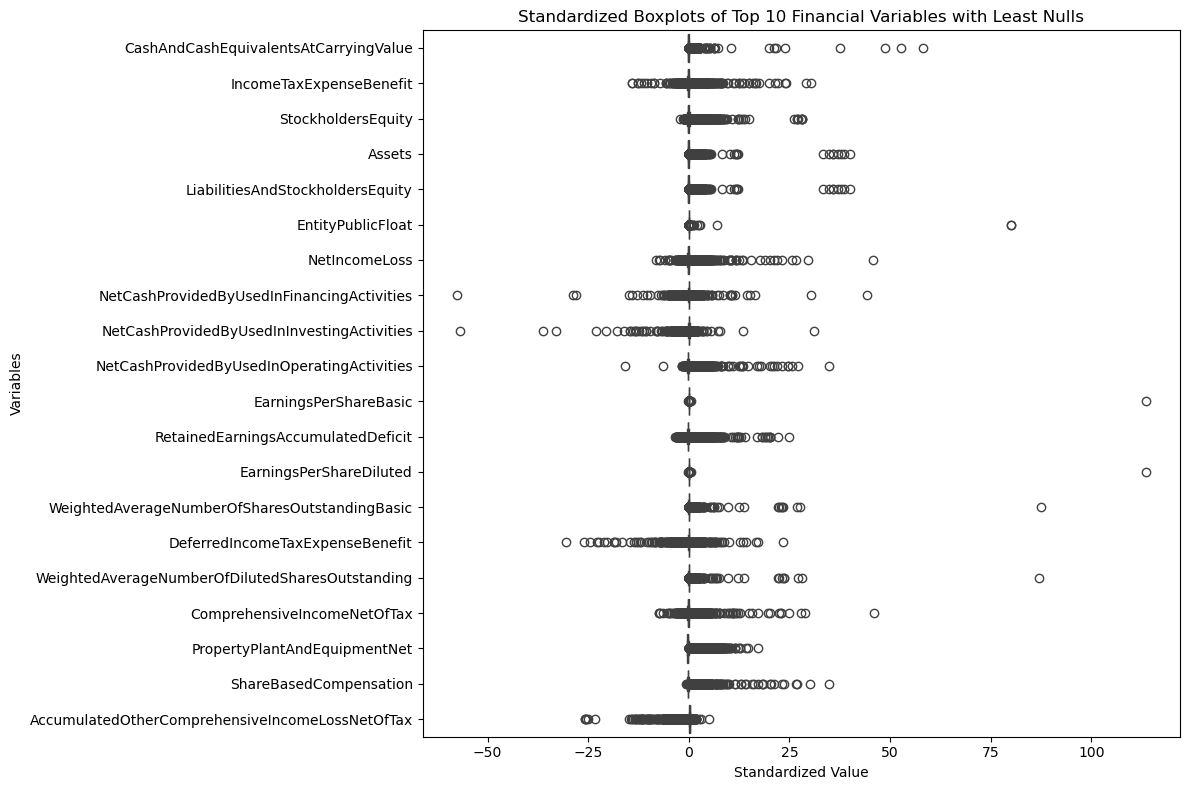

In [18]:
top_cols_threshold = 20
# Select the top x columns with the least amount of nulls (excluding original keys)

top_columns = columns_stats_df.head(top_cols_threshold)['column'].tolist()

data_to_plot = df[top_columns]

# Drop rows with nulls in these columns
data_to_plot = data_to_plot.dropna(subset=top_columns)

# Ensure all columns are numeric
numeric_columns = data_to_plot.select_dtypes(include=[np.number]).columns.tolist()

data_to_plot = data_to_plot[numeric_columns]

# Check if we have at least one numeric column
if not numeric_columns:
    print("No numeric columns found among the top 10 columns.")
else:
    print(f"\nDense submatrix shape: {data_to_plot.shape}")
    # Plot boxplots without standardization
    # plt.figure(figsize=(12, 8))
    # sns.boxplot(data=data_to_plot, orient='h')
    # plt.title('Boxplots of Top 10 Financial Variables with Least Nulls')
    # plt.xlabel('Value')
    # plt.ylabel('Variables')
    # plt.tight_layout()
    # plt.show()

    # Standardize the data for better comparison if scales vary widely
    scaler = StandardScaler()
    data_scaled = pd.DataFrame(scaler.fit_transform(data_to_plot), columns=numeric_columns)

    # Plot standardized boxplots
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=data_scaled, orient='h')
    plt.title('Standardized Boxplots of Top 10 Financial Variables with Least Nulls')
    plt.xlabel('Standardized Value')
    plt.ylabel('Variables')
    plt.tight_layout()
    plt.show()



In [19]:
print('shape before drop', df.shape)
# df = df.dropna()
# df = df.dropna(axis='columns')
# df.shape

shape before drop (40315, 9847)


In [20]:
# Load the statistics DataFrame (columns_stats_df assumed to be already created)
# Filter columns based on null percentage and ensure numeric types
max_null_percentage = 22.0
selected_columns = columns_stats_df[columns_stats_df['percentage_nulls'] <= max_null_percentage]['column'].tolist()
numeric_columns = df[selected_columns].select_dtypes(include=[np.number]).columns.tolist()

# Combine numeric columns with original columns
original_columns = df[original_keys]
combined_dataset = pd.concat([original_columns, df[numeric_columns]], axis=1)

# Drop rows where any of the selected numeric columns are null
cleaned_combined_dataset = combined_dataset.dropna(subset=numeric_columns)

# Write the cleaned dataset to a JSON file
output_filename = './outputs/processed_dataset.json'
cleaned_combined_dataset.to_json(output_filename, orient='records', lines=True)

print(f"Cleaned combined dataset written to: {output_filename}")

Cleaned combined dataset written to: ./outputs/processed_dataset.json


In [32]:
# print(cleaned_combined_dataset[["filing_date", "company"]].head(35))
# print(cleaned_combined_dataset[["company", "bankruptcy_date_1", "bankruptcy_date_2", "bankruptcy_date_3"]].head(35))


bankruptcy_rows = cleaned_combined_dataset[
    (cleaned_combined_dataset["bankruptcy_date_1"].notnull()) |
    (cleaned_combined_dataset["bankruptcy_date_2"].notnull()) |
    (cleaned_combined_dataset["bankruptcy_date_3"].notnull())
]

# Print the filtered rows
print(bankruptcy_rows[["company", "bankruptcy_date_1", "bankruptcy_date_2", "bankruptcy_date_3"]].head(15))

# Calculate the label frequency for bankruptcy_date_1
label_frequency_date_1 = cleaned_combined_dataset["bankruptcy_date_1"].notnull().sum()

# Calculate the label frequency for bankruptcy_date_2
label_frequency_date_2 = cleaned_combined_dataset["bankruptcy_date_2"].notnull().sum()

# Print the frequencies
print(f"Label frequency for bankruptcy_date_1: {label_frequency_date_1} / {cleaned_combined_dataset.size}")
print(f"Label frequency for bankruptcy_date_2: {label_frequency_date_2} / {cleaned_combined_dataset.size}")

                          company bankruptcy_date_1 bankruptcy_date_2  \
15                       AMR CORP        2011-11-29              None   
16                       AMR CORP        2011-11-29              None   
17                       AMR CORP        2011-11-29              None   
18                       AMR CORP        2011-11-29              None   
19   AMERICAN AIRLINES GROUP INC.        2011-11-29              None   
74                     ACETO CORP        2019-02-19              None   
75                     ACETO CORP        2019-02-19              None   
76                     ACETO CORP        2019-02-19              None   
79                     ACETO CORP        2019-02-19              None   
80                     ACETO CORP        2019-02-19              None   
81                     ACETO CORP        2019-02-19              None   
163                ALEXANDERS INC        1992-05-15              None   
164                ALEXANDERS INC        1992-05-15

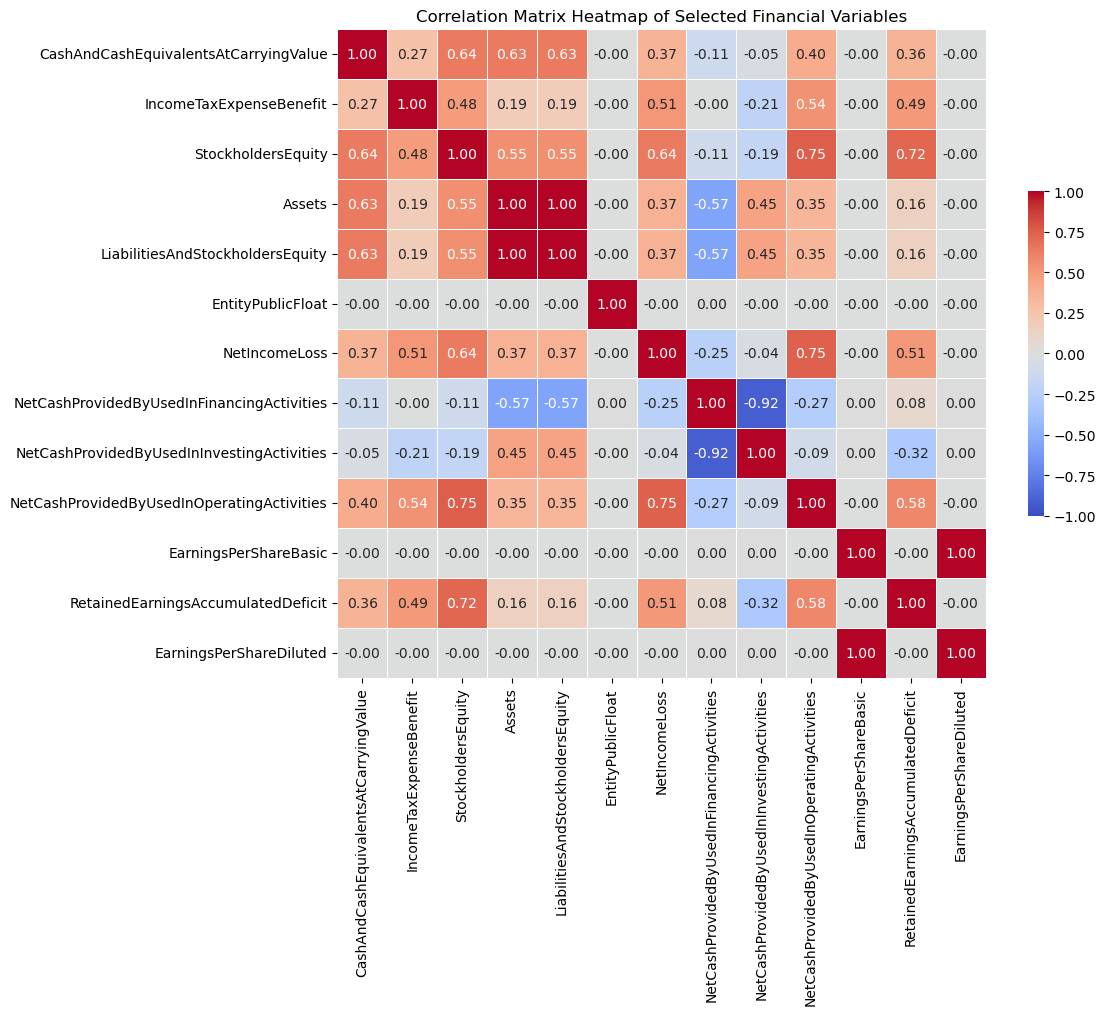

In [26]:
data_for_correlation = df[numeric_columns].dropna()

# Check if there are enough variables to compute correlations
if len(numeric_columns) < 2:
    print("Not enough numeric columns with the specified null percentage threshold to compute correlations.")
else:
    # Compute the correlation matrix
    corr_matrix = data_for_correlation.corr('pearson')
    
    plt.figure(figsize=(12, 10))

    # Generate a mask for the upper triangle (optional)
    # mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # add below with mask = mask

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr_matrix, cmap='coolwarm', vmax=1.0, vmin=-1.0, center=0,
                square=True, linewidths=.5, annot=True, fmt='.2f', cbar_kws={"shrink": .5})

    plt.title('Correlation Matrix Heatmap of Selected Financial Variables')
    plt.tight_layout()
    plt.show()


# TODO: add constraint for for "10-K" on date matching. (done)
# combine with: https://zenodo.org/records/10667088 and check if the data is correct (10k annual)

